In [1]:
library(tidyverse)
library(magrittr)
library(MASS)

Warning message:
: package ‘tidyverse’ was built under R version 3.2.5Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Warning message:
: package ‘ggplot2’ was built under R version 3.2.5Warning message:
: package ‘tibble’ was built under R version 3.2.5Warning message:
: package ‘tidyr’ was built under R version 3.2.5Warning message:
: package ‘readr’ was built under R version 3.2.5Warning message:
: package ‘purrr’ was built under R version 3.2.5Warning message:
: package ‘dplyr’ was built under R version 3.2.5Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

 

In [2]:
rand_sigma <- function (n, ev = runif(n, 0, 10)) {
    Z <- matrix(ncol=n, rnorm(n^2))
    decomp <- qr(Z)
    Q <- qr.Q(decomp) 
    R <- qr.R(decomp)
    d <- diag(R)
    ph <- d / abs(d)
    O <- Q %*% diag(ph)
    Z <- t(O) %*% diag(ev) %*% O
    return(Z)
}

## Linear Regression Example

In [3]:
n = 100
p = 5
DATA = mvrnorm(n, runif(p,-10,10), rand_sigma(p)) %>% 
    data.frame %>%
    mutate(Y = 2.5*X3 + X4 - X1 + 0.1*X5 + rnorm(n,0,3))

Warning message:
: package ‘bindrcpp’ was built under R version 3.2.5

In [4]:
head(DATA)

,X1,X2,X3,X4,X5,Y
1,1.220874,-1.121744,3.858059,8.180506,-6.569736,18.47876
2,3.996197,-0.2941845,6.72148,9.96679,-3.359848,25.39923
3,6.215506,-1.317304,10.19279,6.515485,-5.222488,26.10953
4,3.608541,-2.42475,6.095022,8.508152,-4.311251,23.46784
5,2.245398,-4.083587,2.379648,10.1442,-5.179835,11.20529
6,6.378578,-0.2439299,7.962728,9.821972,-6.964493,22.97009


In [110]:
fit = lm(Y~., data=DATA)
fit %>% summary
fit %>% confint


Call:
lm(formula = Y ~ ., data = DATA)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3052 -2.2370 -0.1271  2.1376  6.9012 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.4882     2.3747  -0.627   0.5324    
X1           -0.8719     0.1729  -5.044 2.21e-06 ***
X2           -0.2687     0.1602  -1.677   0.0968 .  
X3            2.3889     0.1476  16.189  < 2e-16 ***
X4            1.0223     0.1455   7.028 3.29e-10 ***
X5            0.2502     0.1425   1.756   0.0824 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.049 on 94 degrees of freedom
Multiple R-squared:  0.8554,	Adjusted R-squared:  0.8477 
F-statistic: 111.2 on 5 and 94 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-6.203210,3.226786
X1,-1.2151098,-0.5286919
X2,-0.58676628,0.04940582
X3,2.095923,2.681904
X4,0.7335041,1.3111441
X5,-0.03276934,0.53315007


## Example with correlated predictors

In [20]:
n = 100
p = 3
sigma = matrix(c(1,0,0,
               0, 1, 0.95,
               0, 0.95, 1), nrow=3)
DATA = mvrnorm(n, c(0,0,0), sigma) %>% 
    data.frame %>%
    mutate(Y = X3 -0.5*X1 + rnorm(n,0,1))

In [21]:
fit = lm(Y~., data=DATA)
fit %>% summary
fit %>% confint


Call:
lm(formula = Y ~ ., data = DATA)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7462 -0.5790 -0.1097  0.7041  2.5282 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19433    0.09744   1.994   0.0489 *  
X1          -0.56322    0.11380  -4.949 3.18e-06 ***
X2           0.13058    0.27233   0.480   0.6327    
X3           0.68827    0.28044   2.454   0.0159 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9611 on 96 degrees of freedom
Multiple R-squared:  0.5324,	Adjusted R-squared:  0.5178 
F-statistic: 36.44 on 3 and 96 DF,  p-value: 8.23e-16


,2.5 %,97.5 %
(Intercept),0.0009228448,0.3877370409
X1,-0.789111,-0.337325
X2,-0.4099816,0.6711448
X3,0.131587,1.244944


## An example with categorical predictors

In [22]:
n = 100
p = 5
DATA = mvrnorm(n, runif(p,-10,10), rand_sigma(p)) %>% 
    data.frame %>%
    mutate(X1 = X1>mean(X1)) %>%
    mutate(X2 = cut(X2,  breaks=c(-Inf,median(X2),(median(X2)+max(X2))/2,Inf), labels=c("a","b","c"))) %>%
    mutate(X6 = abs(floor((X3 + X4)/2))) %>%
    mutate(Y = 2.5*X3 + atan(X4) - X1 + 0.1*X6*X5 + rnorm(n,0,3))

In [24]:
head(DATA)

,X1,X2,X3,X4,X5,X6,Y
1,FALSE,b,-7.998869,8.619012,4.037756,0,-26.27909
2,FALSE,a,-3.392433,2.380612,10.44228,1,-9.630368
3,FALSE,a,-7.422925,6.00726,6.300037,1,-14.66895
4,FALSE,a,-7.475973,3.625836,6.044227,2,-11.16351
5,FALSE,b,-3.61817,3.789759,8.789973,0,-13.27221
6,TRUE,c,-4.208922,6.901857,5.686138,1,-4.80732


In [23]:
fit = lm(Y~., data=DATA)
fit %>% summary
fit %>% confint


Call:
lm(formula = Y ~ ., data = DATA)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7755 -2.5308 -0.0203  2.4149  7.7341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.03504    4.10494   0.252   0.8015    
X1TRUE      -1.76749    0.84277  -2.097   0.0387 *  
X2b         -1.05475    0.75612  -1.395   0.1664    
X2c          2.15249    1.62679   1.323   0.1891    
X3           2.53357    0.25629   9.886 3.97e-16 ***
X4           0.16914    0.10697   1.581   0.1173    
X5           0.08024    0.34707   0.231   0.8177    
X6           0.48739    0.30048   1.622   0.1082    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.309 on 92 degrees of freedom
Multiple R-squared:  0.8181,	Adjusted R-squared:  0.8043 
F-statistic: 59.12 on 7 and 92 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-7.117735,9.187809
X1TRUE,-3.44130973,-0.09367377
X2b,-2.556463,0.446969
X2c,-1.078450,5.383434
X3,2.024561,3.042580
X4,-0.04330571,0.38158599
X5,-0.6090761,0.7695548
X6,-0.1093892,1.0841657


## Analysis of variance = unpaired t-test = linear model with one categorical predictor

In [25]:
n = 100
p = 3

DATA = data.frame(X = rbinom(n,1,0.4)) %>%
    mutate(Y = 0.5*X + rnorm(n,0,1)) %>%
    mutate(X = factor(X))

In [26]:
head(DATA)

,X,Y
1,0,0.6782103
2,0,0.7117005
3,0,1.828789
4,1,0.9732076
5,1,2.028365
6,0,0.6123052


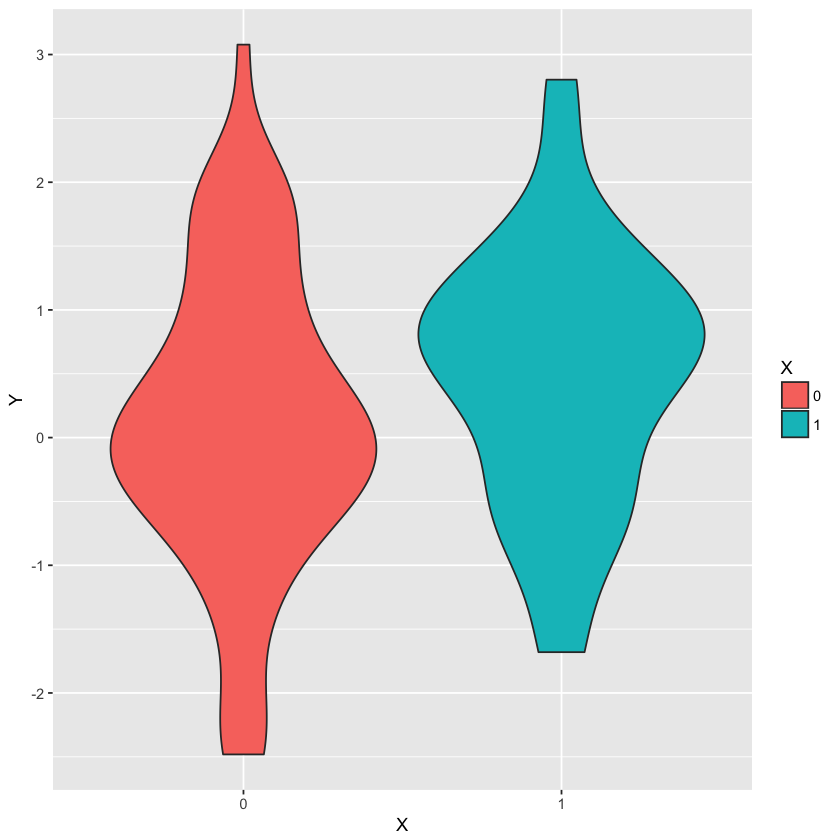

In [184]:
DATA %>% ggplot(aes(y=Y, x=X, fill=X)) + geom_violin()

In [27]:
aov(Y~X, data=DATA) %>% confint
lm(Y~X, data=DATA) %>% confint
t.test(Y~X, data=DATA, var.equal=T)

,2.5 %,97.5 %
(Intercept),-0.2923891,0.2340293
X1,0.2542758,1.0764032


,2.5 %,97.5 %
(Intercept),-0.2923891,0.2340293
X1,0.2542758,1.0764032



	Two Sample t-test

data:  Y by X
t = -3.212, df = 98, p-value = 0.001784
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.0764032 -0.2542758
sample estimates:
mean in group 0 mean in group 1 
    -0.02917993      0.63615960 
